In [1]:
#Making the necessary imports
import os
import numpy as np
from numpy import matrix
import scipy.optimize as theMinimiser
from iminuit import Minuit
import math
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from iminuit.cost import UnbinnedNLL

%matplotlib inline

## Part 1

### Plotting the data

In [2]:
#Load the masses
mass_samples = np.loadtxt("datafile-higgs.txt", dtype=float)

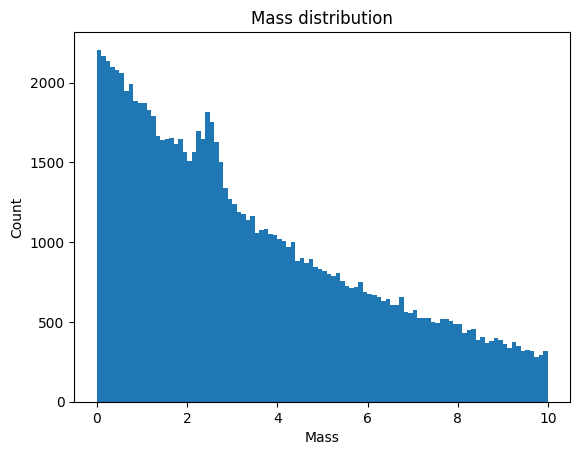

In [3]:
plt.hist(mass_samples, bins=100)
plt.title("Mass distribution")
plt.xlabel("Mass")
plt.ylabel("Count")
plt.show()

### Maximum likelihood fit to the data

In [4]:
# Generate the normalised exponential PDF
def Generate_exp_PDF(mass_samples,tau,mass_low,mass_high):
    C = np.exp(-mass_low/tau)-np.exp(-mass_high/tau) # Calculate the normalisation constant
    return (1/(tau*C))*np.exp(-mass_samples/tau) # Return the normalised exponential PDF

In [5]:
# Generate the guassian PDF
# No need to normalise the guassian PDF as the range of data on each side of the mean is many standard deviations away
# and therefore the data range can be accurately approximated as infinite
def Generate_gauss_PDF(mass_samples, mu):
    return scipy.stats.norm.pdf(mass_samples,mu,sigma) # Return the normalised gaussian PDF

In [6]:
# Generate the combined PDF of the normalised exponential and normalised gaussian PDFs
# This PDF is also normalised as the fraction it takes of the normalised gaussian and exponential PDFs adds up to 1
def PDF_combined(mass_samples,tau,mu,F,mass_low,mass_high):
    PDF1 = Generate_exp_PDF(mass_samples,tau,mass_low,mass_high)
    PDF2 = Generate_gauss_PDF(mass_samples,mu)
    
    return (F * PDF1) + ((1-F) * PDF2)

In [7]:
# Calculate the negative of the log of the joint likelihood
# This is the function we are trying to minimise with the minimiser, given different values of tau, mu and F
def NLL(tau,mu,F):
    P = PDF_combined(mass_samples,tau,mu,F,mass_low,mass_high)
    return -np.sum(np.log(P))

In [8]:
sigma = 0.2 # Using a fixed gaussian width of 0.2

# Setting the range of our mass data for use in normalisation
mass_low = 0 
mass_high = 10

# Set the minimisation parameters
m = Minuit(NLL, tau=5, mu=2, F=0.98)
m.limits["F"] = (0.0,1.0) 
m.limits["tau"] = (0.0,10.0) 
m.limits["mu"] = (1.0,9.0) # Limits on mu set many standard deviations away from data boundaries to accurately
                           # approximate infinite data range 

# Set the errors on the initial start values
m.errors=[0.1,0.1,0.1]

# Set the increase in NLL for the 1-SD error calculation
m.errordef=0.5

# Run the minimisation
m = m.migrad()

In [9]:
# Printing the final results and their error
fstr = "{0:2.2}"
val = m.values["tau","mu","F"]
err = m.errors["tau","mu","F"]
print("{:2s}".format("tau"), "=  ", "{0:2.3f}".format(val[0]), " +/- ", fstr.format(err[0]))
print("\n")
print("{:2s}".format("mu"), "=  ", "{0:2.3f}".format(val[1]), " +/- ", fstr.format(err[1]))
print("\n")
print("{:2s}".format("F"), "=  ", "{0:2.4f}".format(val[2]), " +/- ", fstr.format(err[2]))

tau =   5.008  +/-  0.031


mu =   2.499  +/-  0.015


F  =   0.9796  +/-  0.0012


In [10]:
mean_exp = m.values["mu"]

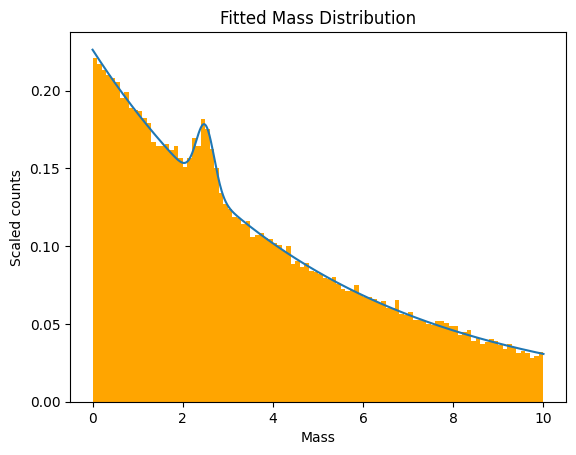

In [11]:
## Plotting the fitted mass distribution
x = np.linspace(mass_low, mass_high, 1000)
y = PDF_combined(x, m.values["tau"],m.values["mu"],m.values["F"], mass_low, mass_high)

counts = plt.hist(mass_samples, bins = 100, color="orange",density=True)
plt.plot(x, y)
plt.title("Fitted Mass Distribution")
plt.xlabel("Mass")
plt.ylabel("Scaled counts")
plt.show()

## Part 2

In [37]:
# Generate the normalised polynomial PDF
def Generate_polynomial_PDF(mass_samples,b,c):
    norm_const = ((c/3)*(mass_high**3)) + ((b/2)*(mass_high**2)) + (a*mass_high) # Calculate normalisation constant
    return (1/norm_const)*(a + b*mass_samples + c*(mass_samples**2)) # Return the normalised polynomial PDF

In [38]:
# Generate the combined PDF of the normalised polynomial and normalised gaussian PDFs
# This PDF is also normalised as the fraction it takes of the normalised gaussian and polynomial PDFs adds up to 1
def PDF_combined(mass_samples,b,c,mu,F):
    PDF1 = Generate_polynomial_PDF(mass_samples,b,c)
    PDF2 = Generate_gauss_PDF(mass_samples,mu)
    
    return (F * PDF1) + ((1-F) * PDF2)

In [39]:
# Calculate the negative of the log of the joint likelihood
# This is the function we are trying to minimise with the minimiser, given different values of b, c, mu and F
NLL = UnbinnedNLL(mass_samples, PDF_combined)

In [40]:
sigma = 0.2 # Using a fixed gaussian width of 0.2
a = 1 # Using a fixed constant polynomial term of 1

# Setting the range of our mass data for use in normalisation
mass_low = 0 
mass_high = 10

# Set the minimisation parameters
m = Minuit(NLL, b=-0.016, c=0.007, mu=2.5, F=0.98)
m.limits["F"] = (0.0,1.0) 
m.limits["b"] = (-0.5,0.5) 
m.limits["c"] = (-0.5,0.5) 
m.limits["mu"] = (1.0,9.0) # Limits on mu set many standard deviations away from data boundaries to accurately
                           # approximate infinite data range 

# Set the errors on the initial start values
m.errors=[0.1,0.001,0.001,0.1]

# Set the increase in NLL for the 1-SD error calculation
m.errordef=0.5

# Run the minimisation
m = m.migrad()

In [41]:
fstr = "{0:2.2}"
val = m.values["b","c","mu","F"]
err = m.errors["b","c","mu","F"]
print("{:2s}".format("b"), "=  ", "{0:2.5f}".format(val[0]), " +/- ", fstr.format(err[0]))
print("\n")
print("{:2s}".format("c"), "=  ", "{0:2.6f}".format(val[1]), " +/- ", fstr.format(err[1]))
print("\n")
print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(val[2]), " +/- ", fstr.format(err[2]))
print("\n")
print("{:2s}".format("F"), "=  ", "{0:2.5f}".format(val[3]), " +/- ", fstr.format(err[3]))

b  =   -0.15779  +/-  0.00075


c  =   0.007295  +/-  8.4e-05


M  =   2.494  +/-  0.011


F  =   0.98202  +/-  0.00082


In [42]:
mean_poly = m.values["mu"]

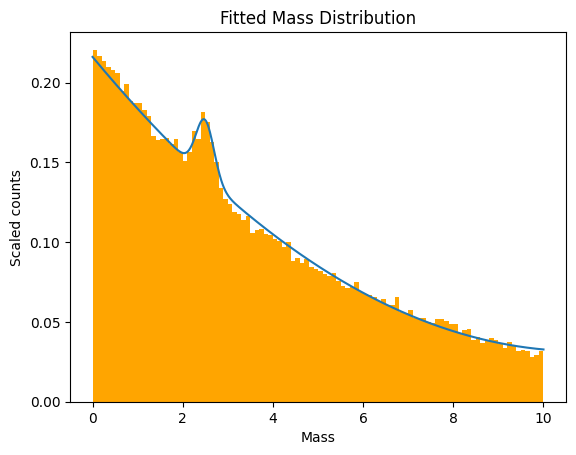

In [43]:
## Plotting the fitted mass distribution
x = np.linspace(mass_low, mass_high, 1000)
y = PDF_combined(x, mu = m.values["mu"], b = m.values["b"],c = m.values["c"] ,F=m.values["F"])

counts = plt.hist(mass_samples, bins = 100, color="orange",density=True)
plt.plot(x, y)
plt.title("Fitted Mass Distribution")
plt.xlabel("Mass")
plt.ylabel("Scaled counts")
plt.show()

In [44]:
## Calculating the systematic error using the "shift" method

syst_error = mean_exp-mean_poly
print("systematic error: ", syst_error)

systematic error:  0.0041915972630870435


In [45]:
## Getting the statistical error on the mean

stat_error = m.errors["mu"]
print("statistical error: ", stat_error)

statistical error:  0.011048175540001148


In [46]:
## Calculating total error by adding in quadrature
total_error = np.sqrt((syst_error**2)+(stat_error**2))

In [47]:
## Display result of mean with all individual errors

print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(m.values["mu"]), " +/- ", fstr.format(stat_error),
      " +/- ", "{0:2.3f}".format(syst_error))

M  =   2.494  +/-  0.011  +/-  0.004


In [48]:
## Display result of mean with total combined errors in quadrature

print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(m.values["mu"]), " +/- ", fstr.format(total_error))

M  =   2.494  +/-  0.012


#### The importance of the systematic error compared to the statistical error for the measurement of M 

Statistical error in our measurement of M is mainly goverened by the total number of mass sample measurements we have as they limit the accuracy of our sub-sample of data which is supposed to represent the true underlying distribution. This type of error can mainly be reduced by increasing the number of mass sample measurements as this will allow us to obtain a more truely representative distribution of the underlying true distribution. With more samples our data will be less prone to the effects of statistical fluctuations. 

On the other hand, systematic error in our measurement of M is mainly goverened by the how much the value of M varies as different models are used to fit the data distribution. A small systematic error means the variation in our the value of M is small when using different assumed models for the fit. 

It is desired for the statistical error to be larger than the systematic error as this means the error on the M value is mainly affected by the amount of data we have rather than the quality of our fit model. For our experiment we calculated a statistical error that is significantly larger than the systematic error. This means we have a relatively good fit model to the data, even though we know it is not the exact one.

Obtained results are meaningless without also quoting their statistial and systematic errors. 

## Part 3

In [24]:
# Generate the normalised linear PDF
def Linear_PDF(x,b):
    linear_dist = lambda x: a + b*(x)
    area, _ = integrate.quad(linear_dist,mass_low,mass_high) # Calculate the normalisation constant
    return (1/area)*(a + b*(x))  # Return the normalised linear PDF

In [25]:
# Generate the combined PDF of the normalised linear and normalised gaussian PDFs
# This PDF is also normalised as the fraction it takes of the normalised gaussian and linear PDFs adds up to 1
def PDF_combined(mass_samples,b,mu,F):
    PDF1 = Linear_PDF(mass_samples,b)
    PDF2 = Generate_gauss_PDF(mass_samples,mu)
    
    return (F * PDF1) + ((1-F) * PDF2)

In [26]:
# Calculate the negative of the log of the joint likelihood
# This is the function we are trying to minimise with the minimiser, given different values of b, mu and F
NLL = UnbinnedNLL(mass_samples, PDF_combined)

In [27]:
sigma = 0.2 # Using a fixed gaussian width of 0.2
a = 1 # Using a fixed constant term of 1

# Setting the range of our mass data for use in normalisation
mass_low = 0 
mass_high = 10

# Set the minimisation parameters
m = Minuit(NLL, b=-0.09, mu=2.5, F=0.98)
m.limits["F"] = (0.0,1.0) 
m.limits["b"] = (-0.5,0.5) 
m.limits["mu"] = (1.0,9.0) # Limits on mu set many standard deviations away from data boundaries to accurately
                           # approximate infinite data range 

# Set the errors on the initial start values
m.errors=[0.01,0.01,0.01]

# Set the increase in NLL for the 1-SD error calculation
m.errordef=0.5

# Run the minimisation
m = m.migrad()

In [28]:
fstr = "{0:2.2}"
val = m.values["b","mu","F"]
err = m.errors["b","mu","F"]
print("{:2s}".format("b"), "=  ", "{0:2.5f}".format(val[0]), " +/- ", fstr.format(err[0]))
print("\n")
print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(val[1]), " +/- ", fstr.format(err[1]))
print("\n")
print("{:2s}".format("F"), "=  ", "{0:2.5f}".format(val[2]), " +/- ", fstr.format(err[2]))

b  =   -0.09041  +/-  0.00016


M  =   2.465  +/-  0.011


F  =   0.98013  +/-  0.00082


In [29]:
mean_linear = m.values["mu"]

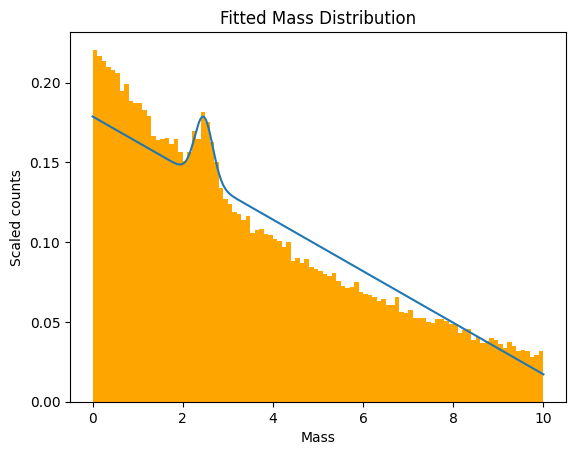

In [30]:
## Plotting the fitted mass distribution
x = np.linspace(0, 10, 1000)
y = PDF_combined(x,m.values["b"],m.values["mu"],m.values["F"])

counts = plt.hist(mass_samples, bins = 100, color="orange",density=True)
plt.plot(x, y)
plt.title("Fitted Mass Distribution")
plt.xlabel("Mass")
plt.ylabel("Scaled counts")
plt.show()

In [31]:
## Calculating the difference in mean between all of the models

diff_1_2 = np.abs(mean_exp-mean_poly)

diff_1_3 = np.abs(mean_exp-mean_linear)

diff_2_3 = np.abs(mean_poly-mean_linear)

print(diff_1_2)
print(diff_1_3)
print(diff_2_3)


0.0041915972630870435
0.03308164284112669
0.028890045578039647


In [32]:
## Taking the largest difference between the mean values as the systematic uncertainty

syst_error = diff_1_3
print("systematic error: ", syst_error)

systematic error:  0.03308164284112669


In [33]:
## Getting the statistical error on the mean

stat_error = m.errors["mu"]
print("statistical error: ", stat_error)

statistical error:  0.010704145512545393


In [34]:
## Calculating total error by adding in quadrature
total_error = np.sqrt((syst_error**2)+(stat_error**2))

In [35]:
## Display result of mean with all individual errors

print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(m.values["mu"]), " +/- ", fstr.format(stat_error),
      " +/- ", "{0:2.3f}".format(syst_error))

M  =   2.465  +/-  0.011  +/-  0.033


In [36]:
## Display result of mean with total combined errors in quadrature

print("{:2s}".format("M"), "=  ", "{0:2.3f}".format(m.values["mu"]), " +/- ", fstr.format(total_error))

M  =   2.465  +/-  0.035


The statistical error for this fit has remained very similar to the previous fits.

The systematic error is governed by how well the model fits the data compared to the best fitting model. The systematic error of this model fit is the largest of the three fits as the model we are using fits the data most poorly. This results in the obtained value of M to deviate by the largest amount from the true value based on the fit.

It is desired for the statistical error to be larger than the systematic error as this means the error on the value of M is mainly affected by the amount of data we have rather than the quality of our fit model. For this fit we calculated a systematic error that is larger than the statistical error. This means that the deviation in the value of M that we calculate away from the true value mainly comes from using a model that fits poorly to the data rather than the limited number of samples.



The value of M we obtained is meaningless without also quoting its statistical and systematic errors. 
